<a href="https://colab.research.google.com/github/HWMV/Machine_Learning/blob/main/Machine_learning6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 지도학습 & 비지도 학습
1. 지도 학습 이란?
* 인공지능 모델에게 데이터로 정답을 알려주고,정답을 잘 매칭 시키도록 학습 시키는 것

2. 비지도 학습 이란?
* AI 모델에게 정답을 주지 않고 스스로 데이터의 특징을 분류하여 그룹핑하고 매칭 시키도록 학습 시키는 것

1. 차원축소
* PCA(Principal Component Analysis)
  * 차원 축소 기법 중 대표 기법
  * 고차원에서(피처가 많은) 저차원으로 축소하는 선형 투영 기법
  * 데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐
* PCA 단계
  * 데이터에서 분산이 최대인 축을 찾음 (1축)
  * 1축과 직교하면서 분산이 최대인 축을 찾음 (2축)
  * 1축과 2축에 직교하면서 분산이 최대인 축을 찾음(3축, 3차원)




In [1]:
# 차원 축소
# 라이브러리 불러오기
import pandas as pd
# wine 데이터 불러오기
from sklearn.datasets import load_wine

In [2]:
# dataset 준비
dataset = load_wine()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [6]:
# 데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# 스케일링 : 모델이 성능을 향상하기 위해 스케일링 진행, 범위를 일치 시키기 위함
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data) # 위 데이터를 transform 해서 fit 하자!
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [10]:
# 데이터 복사 (df 변수)(copy)
df = data.copy()
# 위 까지가 PCA 를 하기 위한 사전 작업!

In [12]:
# PCA : 시각화는 데이터를 한눈에 볼 수 있게끔 해주므로 필요하다. 쓸모없는 feature 제거로 노이즈 제거
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   # n_components=? 인수 필수! : 차원의 수

In [14]:
# PCA
df = pca.fit_transform(df)   # 차원 2개로 축소

In [15]:
# data 크기 확인
df.shape

(178, 2)

In [16]:
# sample data 확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [18]:
# 위 내용으로 PCA(2차원) 시각화
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [21]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

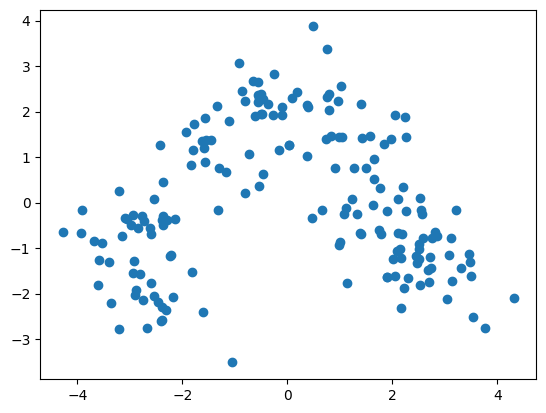

In [23]:
# scatter : 시각화 하기 위함
plt.scatter(df.iloc[:,0], df.iloc[:,1])   # x, y 축에 들어갈 데이터 인수 대입
# 전체 데이터에서 1번째, 2번째 데이터 넣어봄


In [26]:
# target 확인 (색이 같아서 헷갈려요)(DataFrame은 target 속성이 없다)
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

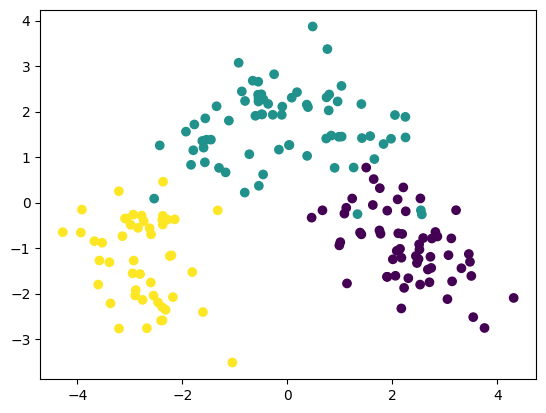

In [27]:
# scatter (c=target) : target에 색입히기(구분)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)
# 비지도학습에는 target 값이 없다

In [29]:
# 각 색별로 군집을 이루고 있다
# 데이터 설명(%)
print(pca.explained_variance_ratio_)    # 1번째 36%, 2번째 피처 20%의 설명력
print(pca.explained_variance_ratio_.sum())    # 13개에서 2개로 축소 했을때 설명력

[0.36198848 0.1920749 ]
0.5540633835693531


* 지도 학습 (PCA 전후 비교)

In [31]:
# PCA 후 데이터로 머신러닝 (2개 피처)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()
# df : PCA 후 데이터

0.9492063492063492

In [32]:
# PCA 전 데이터로 머신러닝 (13개 피처)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()
# data : PCA 후 데이터

0.9553968253968254

* PCA(3차원) 시각화

In [33]:
# 새 데이터 복사
df = data.copy()

In [34]:
# PCA (n_components=3)
pca = PCA(n_components=3)

In [37]:
# PCA 변환
df = pca.fit_transform(df)

In [39]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


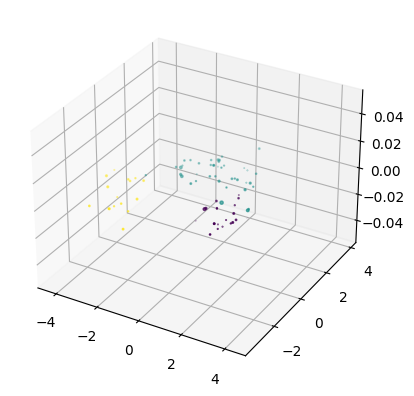

In [40]:
# 시각화 (3차원)
# 새로운 라이브러리 불러오기 필요
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=dataset.target)
